# BioE 135/235 HW1 Q3

In this question, you will be looking at two different, simpler models of the central dogma than the ones you developed in question 1. You will then simulate and plot them, and, at the end, you will compare the extent to which the two models are similar, and the conditions under which that is the case.

To start off with, run the cell below to get some preliminary setup tools ready.

In [2]:
import scipy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

Now that we've imported the necessary packages, let's introduce the first model, wherein we'll treat the system as though it consists of two species: the mRNA (which has concentration $m(t)$), and the protein (which has concentration $P(t)$) that is produced from translating this mRNA. These two species will constitute the _state_ of our system.

Let's suppose that mRNA is transcribed at a constant rate $k_{tx}$, and degrades at a rate $k_{dm}$. This yields equation (1) below:
$$\frac{d}{dt}m(t) = k_{tx} - k_{dm} m(t)$$

Likewise, we'll suppose that protein is translated from mRNA at a rate $k_{tl}$, and degrades at a rate $k_{dp}$. This is shown in equation (2):
$$\frac{d}{dt}P(t) = k_{tl} m(t) - k_{dp} P(t)$$

## Part (a):
Express the above equations in a matrix form, such that we have
$$\frac{d}{dt} \begin{bmatrix} m(t) \\ P(t) \end{bmatrix} = A \begin{bmatrix} m(t) \\ P(t) \end{bmatrix} + \vec{b}$$

Where $A$ is a 2x2 matrix, and $\vec{b}$ is a 2-dimensional vector of constants.

SOLUTION:
$$\frac{d}{dt} \begin{bmatrix} m(t) \\ P(t) \end{bmatrix} = \begin{bmatrix}-k_{dm} & 0 \\ k_{tl} & -k_{dp} \end{bmatrix} \begin{bmatrix} m(t) \\ P(t) \end{bmatrix} + \begin{bmatrix} k_{tx} \\ 0 \end{bmatrix}$$

## Part (b):
For the next model, we will work off of a slightly modified version of equation (1) -- in particular, we will apply QSSA to assert that equation (1) is equal to 0. Solve for the steady-state mRNA concentration $m_{ss}$. Using this steady-state value, what is equation (2) now?

SOLUTION:
$$\frac{d}{dt}P(t) = \frac{k_{tx}k_{tl}}{k_{dm}} - k_{dp} P(t)$$

## Part (c):
Lastly, we will try using Python to simulate each of the above differential equations, and try to get a sense of where it's valid to apply QSSA on this system!

This involves a couple of different parts. Firstly, we will be using the `odeint` function from the SciPy library to actually perform our simulations -- you can read up on it [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

However, in order to _use_ `odeint`, we need to specify our differential equations in the form of a function that maps our _state,_ a time variable, and any other parameters, to an output that is the time derivative of our state. So, for this question, we'll want to create a function that maps our mRNA concentration, protein concentration, time, and all the system parameters to the time derivative of our mRNA concentration and protein concentration.  We will need to do this for each of the models we have made.

In [3]:
def model1(y, t, k_tx, k_dm, k_tl, k_dp): # this model WILL NOT assume QSSA
    mRNA, protein = y # some preliminary setup -- don't worry about this!
    
    # PART (c)(i) 
    # TODO: fill in this section with the correct equations for dmRNA/dt and dprotein/dt
    dmRNAdt = k_tx - mRNA * k_dm
    dproteindt = mRNA * k_tl - protein * k_dp
    
    # END TODO
    dydt = [dmRNAdt, dproteindt]
    return dydt
    
def model2(y, t, k_tx, k_dm, k_tl, k_dp): # this model WILL assume QSSA
    mRNA, protein = y # some preliminary setup -- don't worry about this!
    
    # PART (c)(ii)
    # TODO: fill in this section with the correct equations for dmRNA/dt and dprotein/dt
    dmRNAdt = 0
    dproteindt = k_tx / k_dm * k_tl - k_dp * protein
    
    # END TODO
    dydt = [dmRNAdt, dproteindt]
    return dydt

Now that that's done, we can go ahead and simulate the systems and compare them to see where they look pretty similar to each other; play around with the values of $k_{tx}$, $k_{dm}$, $k_{tl}$, $k_{dp}$, and observe the graphs that result.  Under what set of circumstances do they look similar? Different?

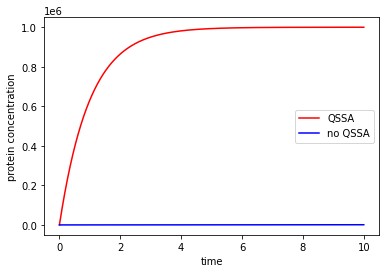

In [4]:
y0 = [0, 0]
t = np.linspace(0, 10, 1000000)

# PART (c)(iii)
# TODO: play around with these values to determine under which circumstances it is appropriate to apply QSSA
k_tx = 10
k_dm = 1e-4
k_tl = 10
k_dp = 1

# END TODO
sol1 = odeint(model1, y0, t, args=(k_tx, k_dm, k_tl, k_dp))
sol2 = odeint(model2, y0, t, args=(k_tx, k_dm, k_tl, k_dp))


fig, ax = plt.subplots()
ax.plot(t, sol2[:,1], c="red", label="QSSA")
ax.plot(t, sol1[:,1], c="blue", label="no QSSA")
ax.legend()
plt.xlabel("time")
plt.ylabel("protein concentration")

plt.show()

SOLUTION: 
You should find that the ration $\frac{k_{dp}}{k_{dm}}$ will affect whether or not the QSSA is valid here.  In particular, having this ratio very close to zero will validate QSSA, and having it closer to or greater than 1 will invalidate it.